In [1]:
from pyomo.environ import *
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import random 
import math
import matplotlib
import matplotlib.pyplot as plt
from random import randrange

In [2]:
k=0
#df_details = pd.read_csv('Details_Power_Curve.csv', index_col=0) #Uncomment
df_details = pd.read_csv(r'C:\Users\09ant\Documents\College\Masters\5th Year\Thesis\Models & Data\Wind Turbine Output Model\wind_details\Details_Power_Curve.csv', index_col=0)
df_details = df_details[["MHI Vestas V164/8000 OFF","MHI Vestas V164/9500 OFF","Enercon E126/7580 OFF","Avera M5000-116 OFF"]]
wt = df_details.columns[k]
radius = df_details.loc['rotor radius'][k]
min_distance = 14*radius
min_distance = min_distance/1000
df_details

,MHI Vestas V164/8000 OFF,MHI Vestas V164/9500 OFF,Enercon E126/7580 OFF,Avera M5000-116 OFF
Details,,,,
cut in ws,4,3.5,2.5,4.0
rated ws,13,14.0,17.0,12.5
cut off ws,25,25.0,25.0,25.0
min hub height,0,0.0,135.0,90.0
max hub height,0,0.0,135.0,90.0
rotor radius,82,82.0,63.5,58.0


In [3]:
#Dundalk to Balbriggan - Works
# 220 = 4.49

latlist = []
lonlist = []

lat1, lon1 = 53.635454, -6.066935  # need to be reused 
lat2, lon2 = 53.954365, -6.276685
lat3, lon3 = 53.942936, -5.989250
lat4, lon4 = 53.645816, -5.930986  # need to be reused 


latlist.append(math.radians(lat1))
lonlist.append(math.radians(lon1))

latlist.append(math.radians(lat2))
lonlist.append(math.radians(lon2))

latlist.append(math.radians(lat3))
lonlist.append(math.radians(lon3))

latlist.append(math.radians(lat4))
lonlist.append(math.radians(lon4))


# Equations to change to:
# model.y[i] >= mlist[0]*model.x[i] + clist[0]
# model.y[i] <= mlist[1]*model.x[i] + clist[1]
# model.y[i] <= mlist[2]*model.x[i] + clist[2]
# model.y[i] >= mlist[3]*model.x[i] + clist[3]

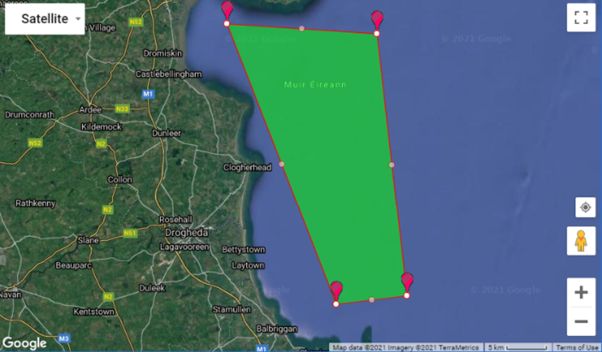

In [4]:
R = 6371.0 #* 1000  #in m
atan = math.atan
sin = math.sin
cos = math.cos
pi = math.pi

answer = 4

distancelist = []
for i in range(0,answer):
    
    if i+1 == (answer):
        lon1 = latlist[answer-1]
        lon2 = latlist[0]
    
        lat1 = lonlist[answer-1]
        lat2 = lonlist[0]
   
        dlon = lon2 - lon1 
        dlat = lat2 - lat1
        #Haversine formula
        a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2 
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        distance = R * c
        
        
        print('The distance between coordinate %s and coordinate %s is %s' %(i, 0, round(distance,4) ))


    else:
        lon1 = latlist[i]
        lon2 = latlist[i+1]

        lat1 = lonlist[i]
        lat2 = lonlist[i+1]

        dlon = lon2 - lon1 
        dlat = lat2 - lat1
        
        #Haversine formula
        a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2 
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        distance = R * c
        
        
        print('The distance between coordinate %s and coordinate %s is %s ' %(i, i+1, round(distance,4) ))
    
    distancelist.append(distance)
    
    
origindist = []
for i in range(1,answer):
    
    lon1 = latlist[0]
    lon2 = latlist[i]

    lat1 = lonlist[0]
    lat2 = lonlist[i]

    dlon = lon2 - lon1 
    dlat = lat2 - lat1

    #Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2 
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    
    origindist.append(distance)
    

The distance between coordinate 0 and coordinate 1 is 42.2854 
The distance between coordinate 1 and coordinate 2 is 31.9963 
The distance between coordinate 2 and coordinate 3 is 33.5027 
The distance between coordinate 3 and coordinate 0 is 15.165


In [5]:
print(lonlist)
print(latlist)

[-0.10588799125448217, -0.10954881936054028, -0.10453213222507038, -0.10351523358968841]
[0.9361152681019628, 0.9416813150727904, 0.94148184139258, 0.9362961191190544]


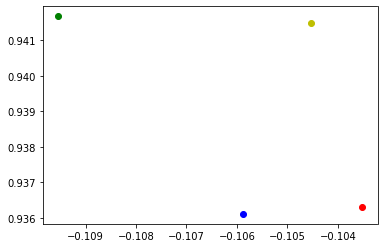

In [6]:
plt.plot(lonlist[0],latlist[0], 'bo')
plt.plot(lonlist[1],latlist[1], 'go')
plt.plot(lonlist[2],latlist[2], 'yo')
plt.plot(lonlist[3],latlist[3], 'ro')

In [7]:
def slope(x1,y1,x2,y2):
    m = round(  ((y2-y1)/(x2-x1))   ,6)
    return m

mlist = []
for i in range(0, answer):
    if i+1 == answer:
        m = slope(lonlist[0],latlist[0],lonlist[answer-1],latlist[answer-1])
    else:
        m= slope(lonlist[i],latlist[i],lonlist[i+1],latlist[i+1])
    mlist.append(m)
    
    
originslope = []
for i in range(1, answer):
    m= slope(lonlist[0],latlist[0],lonlist[i],latlist[i])
    print(m) 
    originslope.append(m)

-1.520434
3.958061
0.07622


In [8]:
mlist

[-1.520434, -0.039762, -5.099547, 0.07622]

In [9]:
#assuming the first lat and lon are 0, 0
# rise/run  use slope, not angles

def coordinates_fuc(i,x,y,m,d):
    print(i)
    print(m)
    angle = atan(m)
    print(angle)
    
    if i < 2:
        if angle < 0:
            angle = pi + angle
    else:
        if angle < 0:
            angle = 2*pi + angle
        
    
    x =  d*cos(angle)
    y =  d*sin(angle)
    print(x)
    print(y)
    print("\n")
    

    return x,y

xlist = [0]
ylist = [0]    

for i in range (0, answer-1):
    
    x,y = coordinates_fuc(i,xlist[0],ylist[0],originslope[i],origindist[i])    

        

    xlist.append(x)
    ylist.append(y)

        
print(xlist)
print(ylist)

0
-1.520434
-0.9890222845157501
-23.23613738026894
35.329013301631825


1
3.958061
1.32332608184362
8.595984420363138
34.02343069084693


2
0.07622
0.07607291262675378
15.121107306658557
1.1525307989135152


[0, -23.23613738026894, 8.595984420363138, 15.121107306658557]
[0, 35.329013301631825, 34.02343069084693, 1.1525307989135152]


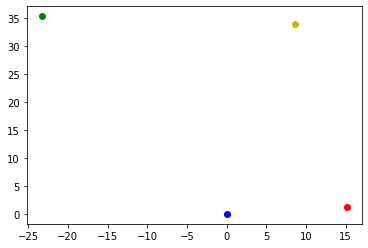

In [10]:
plt.plot(xlist[0],ylist[0], 'bo')
plt.plot(xlist[1],ylist[1], 'go')
plt.plot(xlist[2],ylist[2], 'yo')
plt.plot(xlist[3],ylist[3], 'ro')

In [11]:
xmin = min(xlist)
ymin = min(ylist)

for i in range(0, answer):

    xlist[i] = xlist[i] - xmin
    ylist[i] = ylist[i] - ymin

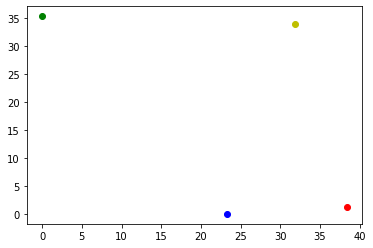

In [12]:
plt.plot(xlist[0],ylist[0], 'bo')
plt.plot(xlist[1],ylist[1], 'go')
plt.plot(xlist[2],ylist[2], 'yo')
plt.plot(xlist[3],ylist[3], 'ro')

In [13]:
def cvalue(x1,y1,x2,y2,m):

    
    c1 = round((-m*x1 + y1),7)
    c2 = round((-m*x2 + y2),7)
    
    print(c1)
    print(c2)
    
    if c1 != c2:
        print('Error')
    
    return c1

In [14]:
clist = []
for i in range(0, answer):
    if i+1 == answer:
        c = cvalue(xlist[0],ylist[0],xlist[answer-1],ylist[answer-1],mlist[answer-1])  
    else:
        c = cvalue(xlist[i],ylist[i],xlist[i+1],ylist[i+1],mlist[i])
    clist.append(c)  
    
    
print(clist)

35.3290133
35.3290133
35.3290133
35.2891395
Error
196.3528319
196.7571029
Error
-1.7710584
-1.7710584
[35.3290133, 35.3290133, 196.3528319, -1.7710584]


In [15]:
xmax = max(xlist)
ymax = max(ylist)

#SPLIT PROBLEM IN TWO
xlist.append( (xlist[1] + xlist[0])/2 )
ylist.append( (ylist[1] + ylist[0])/2 )

xlist.append( (xlist[2] + xlist[3])/2 )
ylist.append( (ylist[2] + ylist[3])/2 )


#SPLIT PROBLEM IN TWO
xlist.append( (xlist[0] + xlist[3])/2 )
ylist.append( (ylist[0] + ylist[3])/2 )

xlist.append( (xlist[1] + xlist[2])/2 )
ylist.append( (ylist[1] + ylist[2])/2 )


#SPLIT PROBLEM IN TWO
xlist.append( (xlist[4] + xlist[5])/2 )
ylist.append( (ylist[4] + ylist[5])/2 )

xlist.append( (xlist[6] + xlist[7])/2 )
ylist.append( (ylist[6] + ylist[7])/2 )


print(xlist)
print(ylist)


m= slope(xlist[4],ylist[4],xlist[5],ylist[5])
mlist.append(m)
c = cvalue(xlist[4],ylist[4],xlist[5],ylist[5],mlist[4])
clist.append(c)  

m= slope(xlist[6],ylist[6],xlist[7],ylist[7])
mlist.append(m)
c = cvalue(xlist[6],ylist[6],xlist[7],ylist[7],mlist[5])
clist.append(c)
    
    
print(clist)
print(mlist)

[23.23613738026894, 0.0, 31.832121800632077, 38.357244686927494, 11.61806869013447, 35.094683243779784, 30.796691033598215, 15.916060900316038, 23.356375966957128, 23.356375966957128]
[0, 35.329013301631825, 34.02343069084693, 1.1525307989135152, 17.664506650815913, 17.587980744880223, 0.5762653994567576, 34.67622199623938, 17.626243697848068, 17.626243697848068]
17.7023816
17.7023894
Error
71.1489463
71.1489419
Error
[35.3290133, 35.3290133, 196.3528319, -1.7710584, 17.7023816, 71.1489463]
[-1.520434, -0.039762, -5.099547, 0.07622, -0.00326, -2.291567]


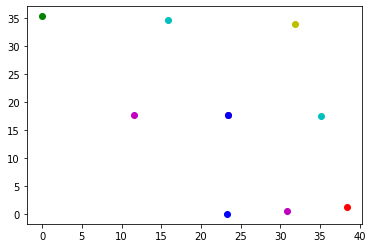

In [16]:
plt.plot(xlist[0],ylist[0], 'bo')
plt.plot(xlist[1],ylist[1], 'go')
plt.plot(xlist[2],ylist[2], 'yo')
plt.plot(xlist[3],ylist[3], 'ro')
plt.plot(xlist[4],ylist[4], 'mo')
plt.plot(xlist[5],ylist[5], 'co')
plt.plot(xlist[6],ylist[6], 'mo')
plt.plot(xlist[7],ylist[7], 'co')
plt.plot(xlist[8],ylist[8], 'ro')
plt.plot(xlist[9],ylist[9], 'bo')

### The pyomo code is taken from Souridi (2020)

(A. Soroudi, “Lecture 14 - Heuristic Methods,” University College Dublin, Dublin, 2020.)

In [17]:
#Section A
xinitiallist = []
yinitiallist = []

for j in range(0,2000):  #more the better, 
    
    x = random.randint(0, ceil(xmax)) # random generation
    y = random.randint(0, ceil(ymax))
    
    if (y>=mlist[0]*x+clist[0]) & (y<=mlist[1]*x+clist[1]) & (y<=mlist[5]*x+clist[5]) & (y>=mlist[4]*x+clist[4]): 

        xinitiallist.append(x)
        yinitiallist.append(y)

print(len(xinitiallist))


model = AbstractModel()
model.N = Param(mutable=True)
model.i = RangeSet(1, model.N)
model.j = Set(initialize=model.i)


# model.L=Param(initialize=100000,mutable=True)
# def initval(model,i):
#     return random.uniform(0,model.L)


model.L=Param(initialize=100000,mutable=True)
def initvalx(model,i):
    k = randrange(0,len(xinitiallist))
    return xinitiallist[k]

def initvaly(model,i):
    k = randrange(0,len(yinitiallist))
    return yinitiallist[k]


model.x = Var(model.i , bounds=(0,xmax+1), within=NonNegativeReals, initialize=initvalx)
model.y = Var(model.i ,bounds=(0,ymax+1) , within=NonNegativeReals, initialize=initvaly)
model.r = Var(bounds=(0,xmax), within=NonNegativeReals)


def C1_rule(model,i,j):
    if i<j:
         return (model.x[i]-model.x[j])**2+(model.y[i]-model.y[j])**2 >= model.r**2
    else:
         return Constraint.Skip
model.C   = Constraint(model.i,model.j, rule=C1_rule)

def C2rule(model,i):
    return model.y[i] >= mlist[0]*model.x[i] + clist[0]
model.C2  = Constraint(model.i,rule=C2rule )


def C3rule(model,i):
    return model.y[i] <= mlist[1]*model.x[i] + clist[1]
model.C3   = Constraint(model.i, rule=C3rule  )

def C4rule(model,i):
    return model.y[i] <= mlist[5]*model.x[i] + clist[5]
model.C4  = Constraint(model.i, rule=C4rule  )

def C5rule(model,i):
    return model.y[i] >= mlist[4]*model.x[i] + clist[4]
model.C5  = Constraint(model.i, rule=C5rule  )


# y=ax+b   y=1x+3   


model.obj = Objective(expr=model.r, sense=maximize)
#opt = SolverFactory('ipopt')


360


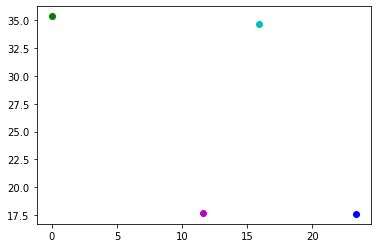

In [18]:
# Section A
plt.plot(xlist[1],ylist[1], 'go')
plt.plot(xlist[4],ylist[4], 'mo')
plt.plot(xlist[7],ylist[7], 'co')
plt.plot(xlist[8],ylist[8], 'bo')

Analysing wind turbine MHI Vestas V164/8000 OFF
MHI Vestas V164/8000 OFF has a radius of 82.0
Min distance should be 1.148 km


Min distance is  2.279


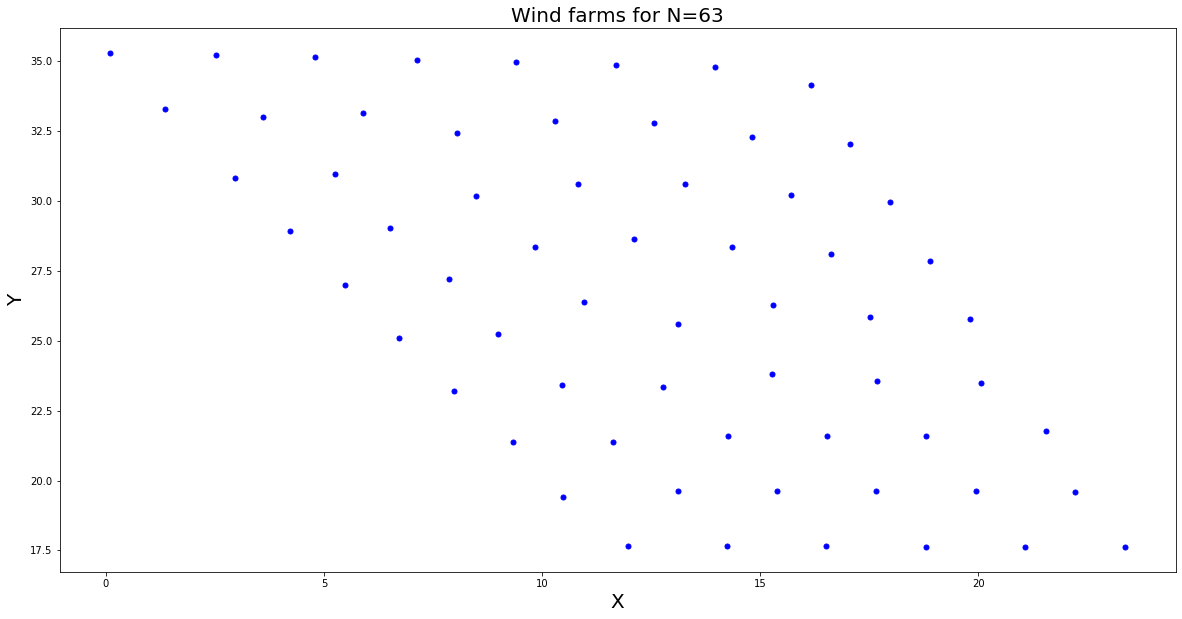

In [19]:
print("Analysing wind turbine %s" %wt)
print("%s has a radius of %s" %(wt,radius))
print('Min distance should be %s km' %(round(min_distance,3)))
print('\n')

model.N=63 #60 = 2.362
instance = model.create_instance()
#results = opt.solve(instance) # solves and updates instance

results =SolverFactory('multistart').solve(instance)  
 
X=[value(instance.x[i]) for i in instance.i]
Y=[value(instance.y[i]) for i in instance.i]
plt.figure(figsize =(20,10))
plt.scatter( X,Y,s=25,color='blue')
plt.xlabel('X',size=20)
plt.ylabel('Y',size=20)
plt.title('Wind farms for N=%s'  %( (str(value(instance.N)))), size=20)
print('Min distance is ',round(value(instance.r),3))
plt.show()

In [20]:
#Section B
xinitiallist = []
yinitiallist = []

for j in range(0,2000):  #more the better, 
    
    x = random.randint(0, ceil(xmax)) # random generation
    y = random.randint(0, ceil(ymax))
     
    if (y>=mlist[5]*x+clist[5]) & (y<=mlist[1]*x+clist[1]) & (y<=mlist[2]*x+clist[2]) & (y>=mlist[4]*x+clist[4]): 

        xinitiallist.append(x)
        yinitiallist.append(y)

print(len(xinitiallist))


model = AbstractModel()
model.N = Param(mutable=True)
model.i = RangeSet(1, model.N)
model.j = Set(initialize=model.i)


# model.L=Param(initialize=100000,mutable=True)
# def initval(model,i):
#     return random.uniform(0,model.L)


model.L=Param(initialize=100000,mutable=True)
def initvalx(model,i):
    k = randrange(0,len(xinitiallist))
    return xinitiallist[k]

def initvaly(model,i):
    k = randrange(0,len(yinitiallist))
    return yinitiallist[k]


model.x = Var(model.i , bounds=(0,xmax+1), within=NonNegativeReals, initialize=initvalx)
model.y = Var(model.i ,bounds=(0,ymax+1) , within=NonNegativeReals, initialize=initvaly)
model.r = Var(bounds=(0,xmax), within=NonNegativeReals)


def C1_rule(model,i,j):
    if i<j:
         return (model.x[i]-model.x[j])**2+(model.y[i]-model.y[j])**2 >= model.r**2
    else:
         return Constraint.Skip
model.C   = Constraint(model.i,model.j, rule=C1_rule)

def C2rule(model,i):
    return model.y[i] >= mlist[5]*model.x[i] + clist[5]
model.C2  = Constraint(model.i,rule=C2rule )


def C3rule(model,i):
    return model.y[i] <= mlist[1]*model.x[i] + clist[1]
model.C3   = Constraint(model.i, rule=C3rule  )

def C4rule(model,i):
    return model.y[i] <= mlist[2]*model.x[i] + clist[2]
model.C4  = Constraint(model.i, rule=C4rule  )

def C5rule(model,i):
    return model.y[i] >= mlist[4]*model.x[i] + clist[4]
model.C5  = Constraint(model.i, rule=C5rule  )


# y=ax+b   y=1x+3   


model.obj = Objective(expr=model.r, sense=maximize)
#opt = SolverFactory('ipopt')


314


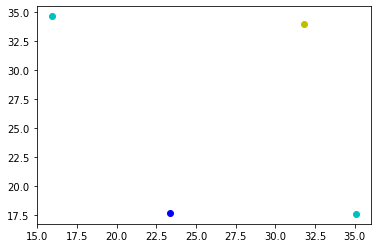

In [21]:
# Section B
plt.plot(xlist[2],ylist[2], 'yo')
plt.plot(xlist[5],ylist[5], 'co')
plt.plot(xlist[7],ylist[7], 'co')
plt.plot(xlist[8],ylist[8], 'bo')

Analysing wind turbine MHI Vestas V164/8000 OFF
MHI Vestas V164/8000 OFF has a radius of 82.0
Min distance should be 1.148 metres


Min distance is  2.3


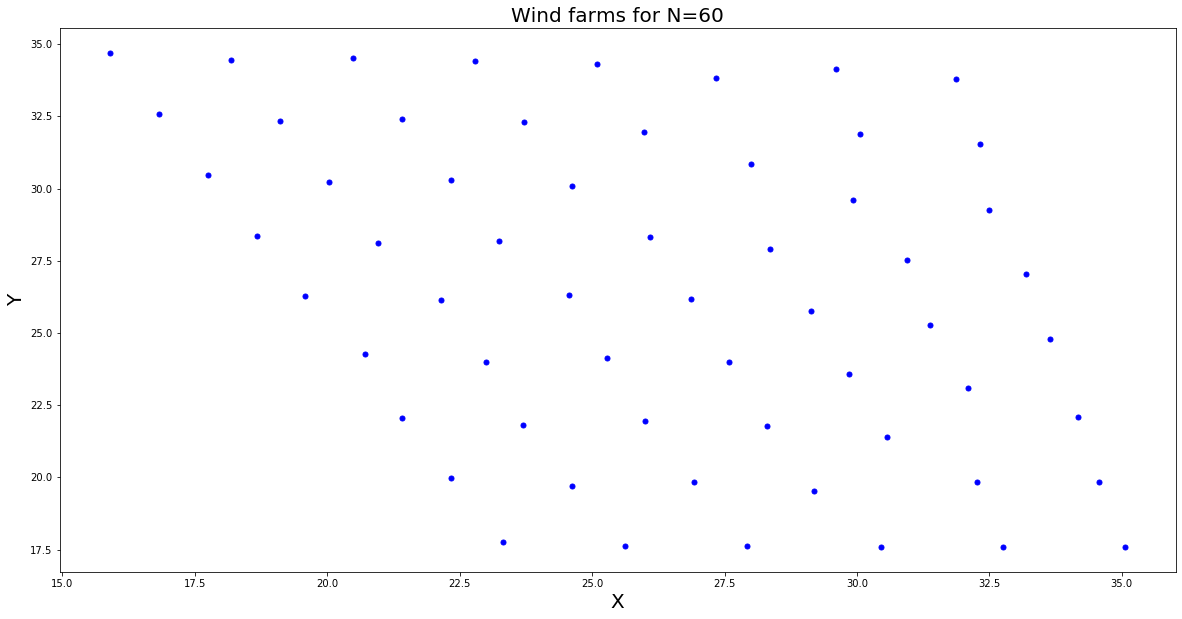

In [22]:
print("Analysing wind turbine %s" %wt)
print("%s has a radius of %s" %(wt,radius))
print('Min distance should be %s metres' %(round(min_distance,3)))
print('\n')

model.N= 60 #60 = 2.298
instance = model.create_instance()
#results = opt.solve(instance) # solves and updates instance

results =SolverFactory('multistart').solve(instance)  
 
X=[value(instance.x[i]) for i in instance.i]
Y=[value(instance.y[i]) for i in instance.i]
plt.figure(figsize =(20,10))
plt.scatter( X,Y,s=25,color='blue')
plt.xlabel('X',size=20)
plt.ylabel('Y',size=20)
plt.title('Wind farms for N=%s'  %( (str(value(instance.N)))), size=20)
print('Min distance is ',round(value(instance.r),3))
plt.show()

In [23]:
#Section C
xinitiallist = []
yinitiallist = []

for j in range(0,2000):  #more the better, 
    
    x = random.randint(0, ceil(xmax)) # random generation
    y = random.randint(0, ceil(ymax))
    

    
    
    if (y>=mlist[5]*x+clist[5]) & (y<=mlist[4]*x+clist[4]) & (y<=mlist[2]*x+clist[2]) & (y>=mlist[3]*x+clist[3]): 

        xinitiallist.append(x)
        yinitiallist.append(y)

print(len(xinitiallist))


model = AbstractModel()
model.N = Param(mutable=True)
model.i = RangeSet(1, model.N)
model.j = Set(initialize=model.i)


# model.L=Param(initialize=100000,mutable=True)
# def initval(model,i):
#     return random.uniform(0,model.L)


model.L=Param(initialize=100000,mutable=True)
def initvalx(model,i):
    k = randrange(0,len(xinitiallist))
    return xinitiallist[k]

def initvaly(model,i):
    k = randrange(0,len(yinitiallist))
    return yinitiallist[k]


model.x = Var(model.i , bounds=(0,xmax+1), within=NonNegativeReals, initialize=initvalx)
model.y = Var(model.i ,bounds=(0,ymax+1) , within=NonNegativeReals, initialize=initvaly)
model.r = Var(bounds=(0,xmax), within=NonNegativeReals)


def C1_rule(model,i,j):
    if i<j:
         return (model.x[i]-model.x[j])**2+(model.y[i]-model.y[j])**2 >= model.r**2
    else:
         return Constraint.Skip
model.C   = Constraint(model.i,model.j, rule=C1_rule)

def C2rule(model,i):
    return model.y[i] >= mlist[5]*model.x[i] + clist[5]
model.C2  = Constraint(model.i,rule=C2rule )


def C3rule(model,i):
    return model.y[i] <= mlist[4]*model.x[i] + clist[4]
model.C3   = Constraint(model.i, rule=C3rule  )

def C4rule(model,i):
    return model.y[i] <= mlist[2]*model.x[i] + clist[2]
model.C4  = Constraint(model.i, rule=C4rule  )

def C5rule(model,i):
    return model.y[i] >= mlist[3]*model.x[i] + clist[3]
model.C5  = Constraint(model.i, rule=C5rule  )


# y=ax+b   y=1x+3   


model.obj = Objective(expr=model.r, sense=maximize)
#opt = SolverFactory('ipopt')


232


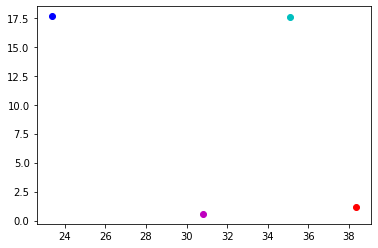

In [24]:
# Section C
plt.plot(xlist[3],ylist[3], 'ro')
plt.plot(xlist[5],ylist[5], 'co')
plt.plot(xlist[6],ylist[6], 'mo')
plt.plot(xlist[8],ylist[8], 'bo')

Analysing wind turbine MHI Vestas V164/8000 OFF
MHI Vestas V164/8000 OFF has a radius of 82.0
Min distance should be 1.148 metres


Min distance is  1.845


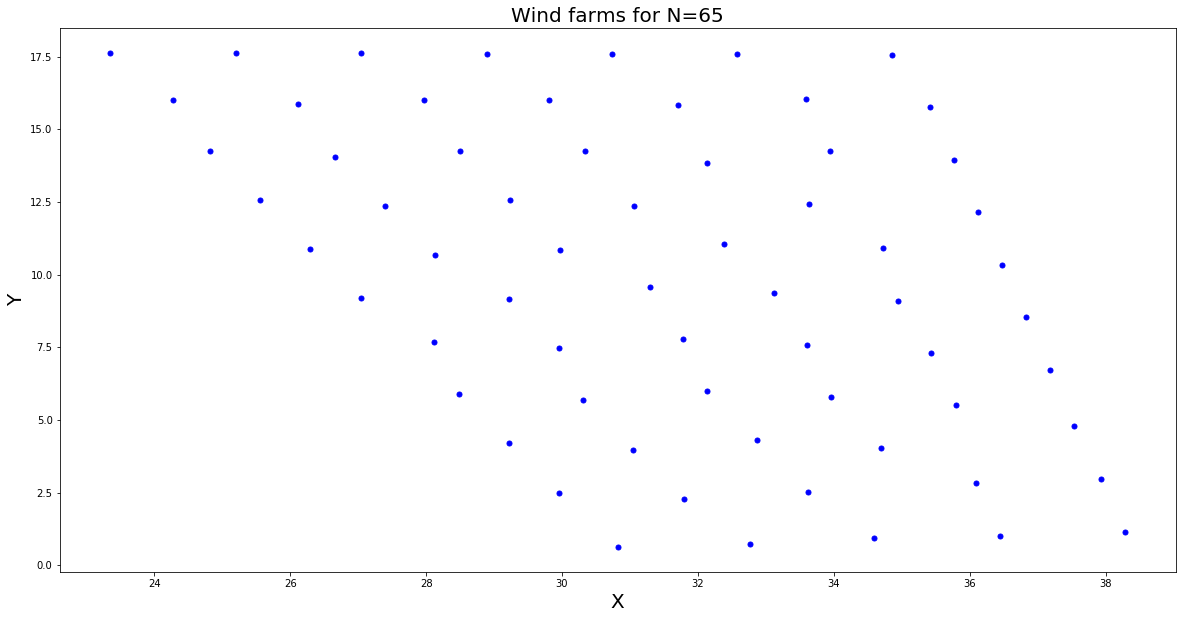

In [25]:
print("Analysing wind turbine %s" %wt)
print("%s has a radius of %s" %(wt,radius))
print('Min distance should be %s metres' %(round(min_distance,3)))
print('\n')

model.N= 65  # 65 = 1.846
instance = model.create_instance()
#results = opt.solve(instance) # solves and updates instance

results =SolverFactory('multistart').solve(instance)  
 
X=[value(instance.x[i]) for i in instance.i]
Y=[value(instance.y[i]) for i in instance.i]
plt.figure(figsize =(20,10))
plt.scatter( X,Y,s=25,color='blue')
plt.xlabel('X',size=20)
plt.ylabel('Y',size=20)
plt.title('Wind farms for N=%s'  %( (str(value(instance.N)))), size=20)
print('Min distance is ',round(value(instance.r),3))
plt.show()

In [26]:
#Section D
xinitiallist = []
yinitiallist = []

for j in range(0,2000):  #more the better, 
    
    x = random.randint(0, ceil(xmax)) # random generation
    y = random.randint(0, ceil(ymax))

    if (y>=mlist[0]*x+clist[0]) & (y<=mlist[4]*x+clist[4]) & (y<=mlist[5]*x+clist[5]) & (y>=mlist[3]*x+clist[3]): 

        xinitiallist.append(x)
        yinitiallist.append(y)

print(len(xinitiallist))


model = AbstractModel()
model.N = Param(mutable=True)
model.i = RangeSet(1, model.N)
model.j = Set(initialize=model.i)


# model.L=Param(initialize=100000,mutable=True)
# def initval(model,i):
#     return random.uniform(0,model.L)


model.L=Param(initialize=100000,mutable=True)
def initvalx(model,i):
    k = randrange(0,len(xinitiallist))
    return xinitiallist[k]

def initvaly(model,i):
    k = randrange(0,len(yinitiallist))
    return yinitiallist[k]


model.x = Var(model.i , bounds=(0,xmax+1), within=NonNegativeReals, initialize=initvalx)
model.y = Var(model.i ,bounds=(0,ymax+1) , within=NonNegativeReals, initialize=initvaly)
model.r = Var(bounds=(0,xmax), within=NonNegativeReals)


def C1_rule(model,i,j):
    if i<j:
         return (model.x[i]-model.x[j])**2+(model.y[i]-model.y[j])**2 >= model.r**2
    else:
         return Constraint.Skip
model.C   = Constraint(model.i,model.j, rule=C1_rule)

def C2rule(model,i):
    return model.y[i] >= mlist[0]*model.x[i] + clist[0]
model.C2  = Constraint(model.i,rule=C2rule )


def C3rule(model,i):
    return model.y[i] <= mlist[4]*model.x[i] + clist[4]
model.C3   = Constraint(model.i, rule=C3rule  )

def C4rule(model,i):
    return model.y[i] <= mlist[5]*model.x[i] + clist[5]
model.C4  = Constraint(model.i, rule=C4rule  )

def C5rule(model,i):
    return model.y[i] >= mlist[3]*model.x[i] + clist[3]
model.C5  = Constraint(model.i, rule=C5rule  )


# y=ax+b   y=1x+3   


model.obj = Objective(expr=model.r, sense=maximize)
#opt = SolverFactory('ipopt')


229


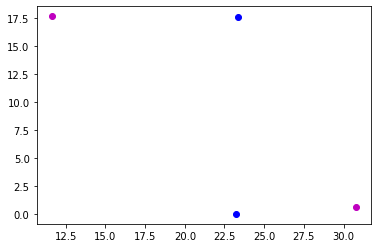

In [27]:
# Section D
plt.plot(xlist[0],ylist[0], 'bo')
plt.plot(xlist[4],ylist[4], 'mo')
plt.plot(xlist[6],ylist[6], 'mo')
plt.plot(xlist[8],ylist[8], 'bo')

Analysing wind turbine MHI Vestas V164/8000 OFF
MHI Vestas V164/8000 OFF has a radius of 82.0
Min distance should be 1.148 metres


Min distance is  2.037


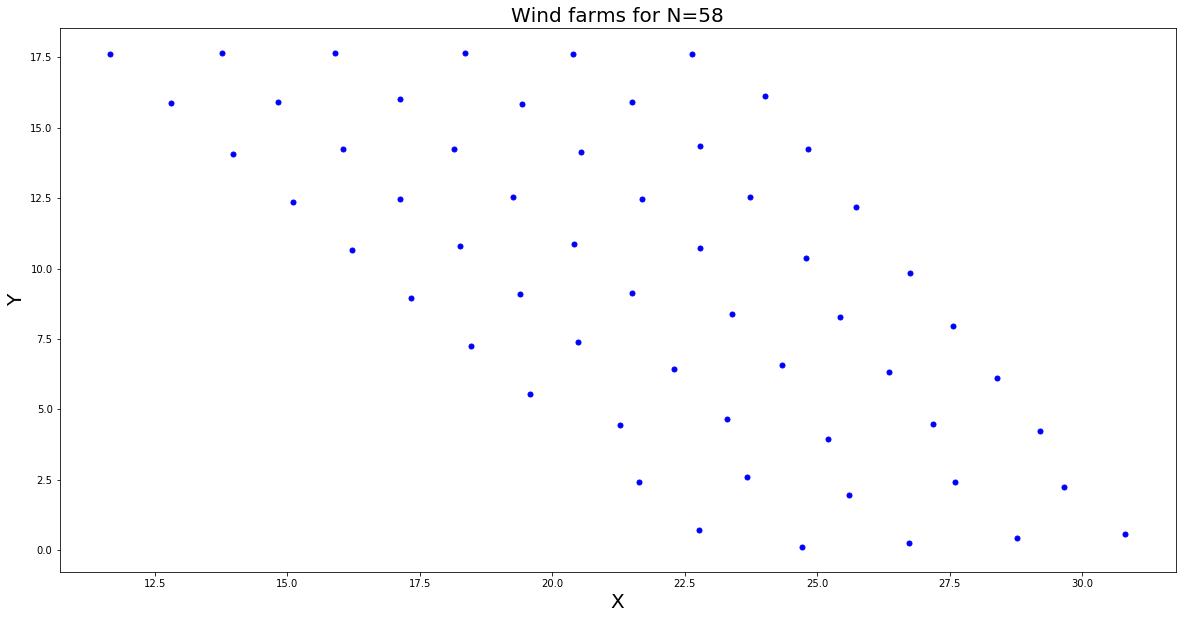

In [28]:
print("Analysing wind turbine %s" %wt)
print("%s has a radius of %s" %(wt,radius))
print('Min distance should be %s metres' %(round(min_distance,3)))
print('\n')

model.N= 58  #58 = 2.037
instance = model.create_instance()
#results = opt.solve(instance) # solves and updates instance

results =SolverFactory('multistart').solve(instance)  
 
X=[value(instance.x[i]) for i in instance.i]
Y=[value(instance.y[i]) for i in instance.i]
plt.figure(figsize =(20,10))
plt.scatter( X,Y,s=25,color='blue')
plt.xlabel('X',size=20)
plt.ylabel('Y',size=20)
plt.title('Wind farms for N=%s'  %( (str(value(instance.N)))), size=20)
print('Min distance is ',round(value(instance.r),3))
plt.show()

In [29]:
#instance.C.pprint()